# Astroquery.Simbad: Cataloging... Cataloging...
#### Jeremy Vo
#### May, 2025

In [1]:
#!pip install --upgrade astroquery astropy

In [2]:
import numpy as np
import astroquery
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u
print(astroquery.__version__)
print(astroquery.simbad.__file__)

0.4.10
C:\Users\jqevo\AppData\Roaming\jupyterlab-desktop\envs\env_1\Lib\site-packages\astroquery\simbad\__init__.py


In [3]:
import numpy as np
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.units as u


# Add needed votable fields
Simbad.add_votable_fields('ra', 'dec','parallax', 'mesdistance', 'otype', 'dim')
Simbad.ROW_LIMIT = -1

# Search radius cone
radius = 90*u.deg
#scanning both hemispheres of the sky
coordinate_north = SkyCoord(0, 90, unit=("deg", "deg"))
coordinate_south = SkyCoord(0, -90, unit=("deg", "deg"))
print(coordinate_north)

# Scanning sky for globular clusters (GlC)
northsky = Simbad.query_region(coordinate_north, radius=radius, criteria = "otype='GlC'")
southsky = Simbad.query_region(coordinate_south, radius=radius, criteria = "otype='GlC'")
print(coordinate_north)
# Verifying kpc distance threshold for next cell
max_distance = u.lyr.to(u.kpc, 100000)
print(max_distance)

<SkyCoord (ICRS): (ra, dec) in deg
    (0., 90.)>
<SkyCoord (ICRS): (ra, dec) in deg
    (0., 90.)>
30.66013937855506


In [4]:
# Combing results for clusters within 30 kpc -- greater than 30 kpc will be out of the milky way
# the is not None if statement scans all entries that are not empty
if northsky is not None:
    #northsky = northsky[~np.isnan(northsky['plx_value']) & (northsky['plx_value'] > 1)]
    #northsky = northsky[~np.isnan(northsky['plx_value']) & (northsky['plx_value'] > (30.66013937855506)**(-1))]
    northsky = northsky[~np.isnan(northsky['mesdistance.dist']) & (northsky['mesdistance.dist'] < 30)]

if southsky is not None:
    #southsky = southsky[~np.isnan(southsky['plx_value']) & (southsky['plx_value'] > 1)]
    #southsky = southsky[~np.isnan(southsky['plx_value']) & (southsky['plx_value'] > (30.66013937855506)**(-1))]
    southsky = southsky[~np.isnan(southsky['mesdistance.dist']) & (southsky['mesdistance.dist'] < 30)]

northsky_name = np.array(northsky['main_id'])
northsky_RA = np.asarray(northsky['ra'], dtype = float)
northsky_DEC = np.asarray(northsky['dec'], dtype = float)
northsky_plx = np.asarray(northsky['plx_value'], dtype = float)
northsky_dist = np.asarray(northsky['mesdistance.dist'], dtype = float)

southsky_name = np.array(southsky['main_id'])
southsky_RA = np.asarray(southsky['ra'], dtype = float)
southsky_DEC = np.asarray(southsky['dec'], dtype = float)
southsky_plx = np.asarray(southsky['plx_value'], dtype = float)
southsky_dist = np.asarray(southsky['mesdistance.dist'], dtype = float)

sky_name = np.append(northsky_name, southsky_name)
sky_RA = np.append(northsky_RA, southsky_RA)
sky_DEC = np.append(northsky_DEC, southsky_DEC)
sky_plx = np.append(northsky_plx, southsky_plx)
sky_dist = np.append(northsky_dist, southsky_dist)

In [5]:
kpc = (sky_plx * 10**(-3))**(-1) / 1000
kpc_dist = sky_dist
azimuth = sky_RA * np.pi / 180
inclination = (90 - sky_DEC) * np.pi / 180
radius = kpc_dist

x = radius * np.sin(inclination) * np.cos(azimuth)
y = radius * np.sin(inclination) * np.sin(azimuth)
z = radius * np.cos(inclination)

galactic_RA = 266.41681662499997 * np.pi / 180
galactic_DEC = -29.00782497222222 * np.pi / 180
galactic_dist = 8 # kpc
x_G = galactic_dist * np.sin(galactic_DEC) * np.cos(galactic_RA)
y_G = galactic_dist * np.sin(galactic_DEC) * np.sin(galactic_RA)
z_G = galactic_dist * np.cos(galactic_DEC)


In [6]:
# Sanity check cell
print(len(sky_name))
#print(x_G, y_G, z_G)
#print(np.cos(galactic_RA))
#np.sin(galactic_DEC)*np.cos(galactic_RA)
#print(sky_name)

164


Text(0.5, 0.92, 'Globular Clusters < 30 kpc from Earth')

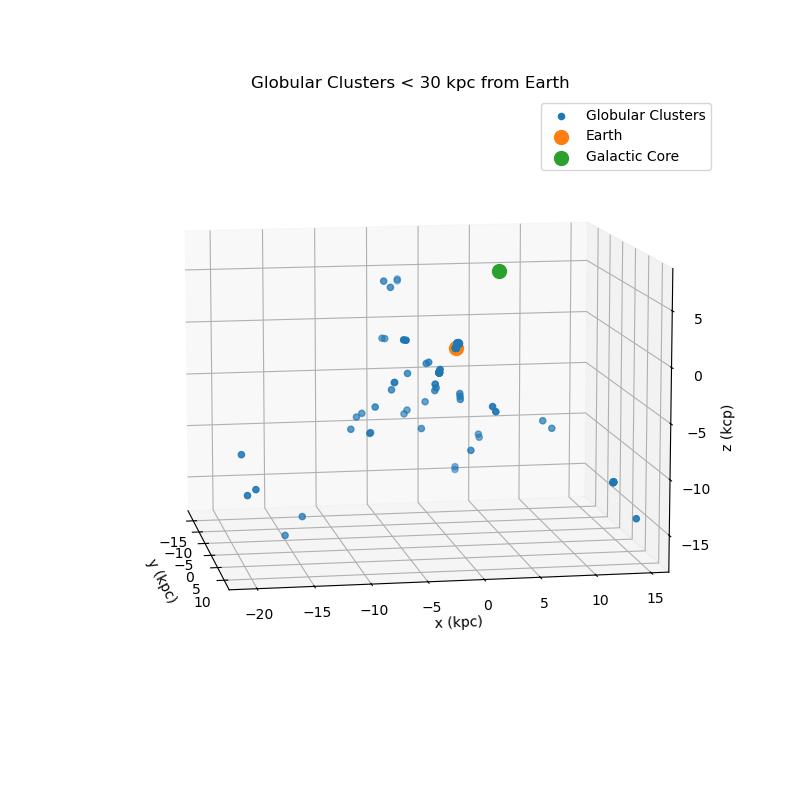

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib widget
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, label = 'Globular Clusters')
ax.scatter(0, 0, 0, label = 'Earth',s=100)
#for i in range(len(sky_name)):
#    ax.text(x[i], y[i], z[i], sky_name[i], fontsize = 10)
ax.scatter(x_G, y_G, z_G, label = 'Galactic Core', s=100)
ax.set_ylabel('x (kpc)')
ax.set_xlabel('y (kpc)')
ax.set_zlabel('z (kcp)')
ax.view_init(elev=10, azim=-10)
ax.set_aspect('equal', 'box')
ax.legend()
ax.set_title('Globular Clusters < 30 kpc from Earth')